In [200]:
import numpy as np
import matplotlib.pyplot as plt


In [173]:
def det(A):
    n,m = A.shape
    if n != m:
        raise ValueError("Podana macierz nie jest kwadratowa")
    if n == 1:
        return A[0,0]
    if n == 2:
        return A[0,0]*A[1,1] - A[0,1]*A[1,0]
    sum = 0
    for j in range(m):
        sum += np.power(-1,1+(j+1))*A[0,j]*det(np.delete(np.delete(A,0,0),j,1))
    return sum

# Zadanie 1

W tym zadaniu należy znaleźć współczynniki funkcji kwadratowej. W tym celu skorzystamy ze wzoru podanego na wykładzie
$$
a_i = \frac{\text{det}A_i}{\text{det}A} = \frac{1}{\text{det}A} \sum^n_{j=0}{y_i A_{ij}} 
$$
gdzie $A_{ij}$ to dopełnienie algebraiczne odpowiadającego elementu macierzy


In [174]:
h = np.array([0,3,6])
p = np.array([1.225,0.905,0.652])
A = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        A[i,j] = h[i]**j
print(A)

[[ 1.  0.  0.]
 [ 1.  3.  9.]
 [ 1.  6. 36.]]


In [175]:
a = np.zeros(3)
for i in range(3):
    suma = 0 
    for j in range(3):
        minor = np.delete(np.delete(A, j, axis=0), i, axis=1)
        dop = ((-1) ** (j + i)) * det(minor)
        suma += p[j]*dop
    a[i] = (1/det(A)) * suma
print(a)

[ 1.225      -0.11783333  0.00372222]


Ostatecznie funkcja prezentuje się następująco


In [176]:
print("f(x) = {} x^2 + {} x+ {}".format(a[2],a[1],a[0]))

f(x) = 0.0037222222222222314 x^2 + -0.11783333333333341 x+ 1.225


Wynik możemy sprawdzić umieszczając naszą funkcję na wykresie wraz z podanymi danymi.

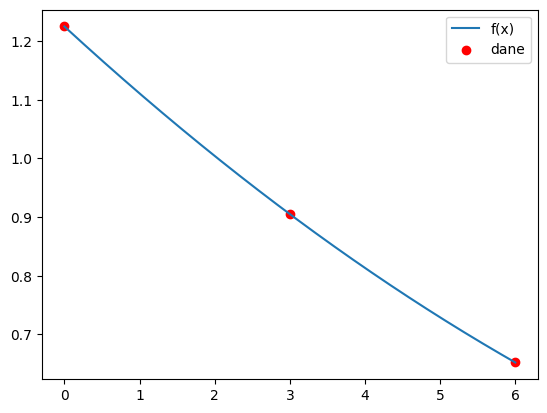

In [177]:
def f(x):
    return 0.0037222222222222314*x**2 -0.11783333333333341*x + 1.225
rng = np.linspace(0,6,1000)
plt.plot(rng,f(rng),label = "f(x)")
plt.scatter(h,p,color="red", label="dane")
plt.legend()

# Zadanie 2

In [178]:
#interpolacja przedziałami liniowa
def linint(xData, yData, x):
    N = len(xData)
    JL = 0; JU = N
    while JU - JL > 1:
        JM = (JU + JL) // 2
        if (xData[-1] > xData[1]) == (x > xData[JM]):
            JL = JM
        else:
            JU = JM
    J = JL
    dx = xData[J + 1] - xData[J]
    df = yData[J + 1] - yData[J]
    fx = df / dx * (x - xData[J]) + yData[J]
    return fx

Badamy za pomocą wykresu prezentację naszych danych


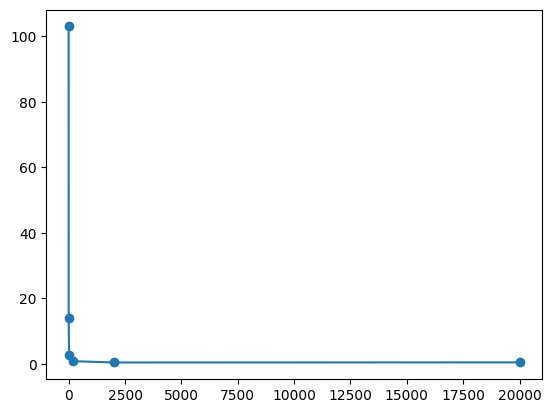

In [179]:
Re = np.array([0.2,2,20,200,2000,20000])
cD = np.array([103,13.9,2.72,0.8,0.401,0.433])
plt.scatter(Re,cD)
plt.plot(Re,cD)

Wyznaczamy nowe wartości funkcji

In [180]:
Re_new = np.array([5,50,5000])
cD_new = np.array([linint(Re,cD,5),linint(Re,cD,50),linint(Re,cD,5000)])

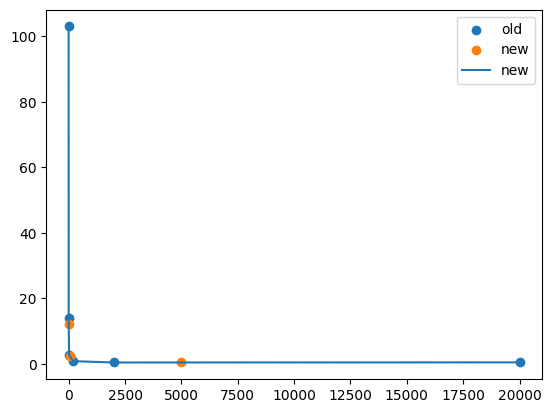

In [181]:
plt.scatter(Re,cD, label="old")
plt.scatter(Re_new,cD_new, label = "new")
plt.plot(Re,cD, label = "new")
plt.legend()

Jak widać na powyższym wykresie, nowe dane zachowują się podobnie do zadanych danych

# Zadanie 3

Chcemy znaleźć współczynniki wielomianu W(x). W tym celu stosujemy sposób z zadania 1

In [182]:
def lagrange(x,xData,yData):
    n = len(xData)
    y = 0
    for i in range(n):
        w = 1.0
        for j in range(n):
            if i != j:
                w = w*(x-xData[j])/(xData[i]-xData[j])
        y = y + w*yData[i]
    return y

In [183]:
Re = np.array([0.2,2,20,200,2000,20000])
cD = np.array([103,13.9,2.72,0.8,0.401,0.433])
A = np.zeros((len(Re),len(Re)))
for i in range(len(Re)):
    for j in range(len(Re)):
        A[i,j] = Re[i]**j

In [184]:
a = np.zeros(len(Re))
for i in range(len(Re)):
    suma = 0 
    for j in range(len(Re)):
        minor = np.delete(np.delete(A, j, axis=0), i, axis=1)
        dop = ((-1) ** (j + i)) * det(minor)
        suma += cD[j]*dop
    a[i] = (1/det(A)) * suma
print("Współczynniki wielomianu : {}".format(a))

Współczynniki wielomianu : [ 1.13997032e+02 -5.55392094e+01  2.77301829e+00 -1.38495052e-02
  6.85542040e-06 -3.08493537e-10]


Za pomocą tych współczynników definiujemy naszą funkcję i obliczamy nowe dane


In [185]:
def W(x,a):
    result = 0
    for i in range(len(a)):
        result += (x**i) *(a[i])
    return result

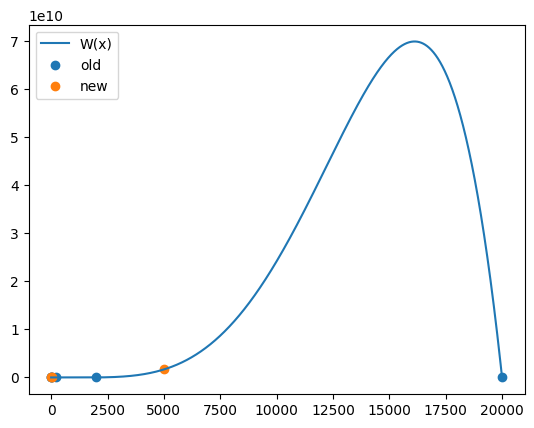

In [186]:
Re_range = np.linspace(0.2,20000,100000)
cD_range = W(Re_range,a)
Re_new = np.array([5,50,5000])
cD_new = W(Re_new,a)
plt.plot(Re_range,cD_range,label="W(x)")
plt.scatter(Re,cD, label="old")
plt.scatter(Re_new,cD_new, label = "new")
plt.legend()

Jak wida na powyszym wykresie, dla większych wartości wielomian podaje mocno zawyżone dane, jednak nowe wartości, które mieliśmy wygenerować, wpasowują się w jego krzywą.

# Zadanie 4

In [187]:
def mean_square(x,y):
    #zwraca a i b
    n = len(x)
    a = (n * np.sum(x*y) - np.sum(x) * np.sum(y) ) / (n * np.sum(x**2) - np.sum(x)**2)
    b = (np.sum(x**2) * np.sum(y) - np.sum(x) * np.sum(x*y)) / (n*np.sum(x**2) - np.sum(x)**2)
    return [a,b]

Mamy do czynienia z funkcją wykładniczą. W celu obliczenia jej współczynników możemy najpierw zamienić ją na funkcję liniową za pomocą logarytmu, a następnie zastosować na niej regresję liniową. Potem wrócimy za pomocą eksponenty to oryginalnej postaci funkcji

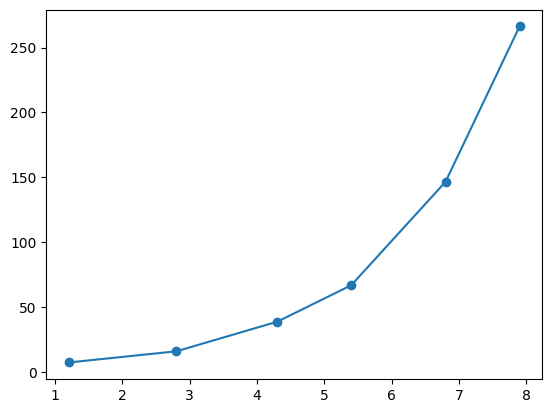

In [188]:
x = np.array([1.2, 2.8, 4.3, 5.4, 6.8, 7.9])
y = np.array([7.5, 16.1, 38.9, 67, 146.6, 266.2])
plt.scatter(x,y)
plt.plot(x,y)

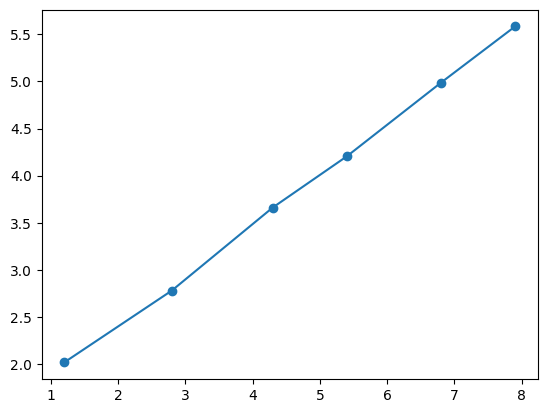

In [189]:
ln_y = np.log(y)
plt.scatter(x,ln_y)
plt.plot(x,ln_y)

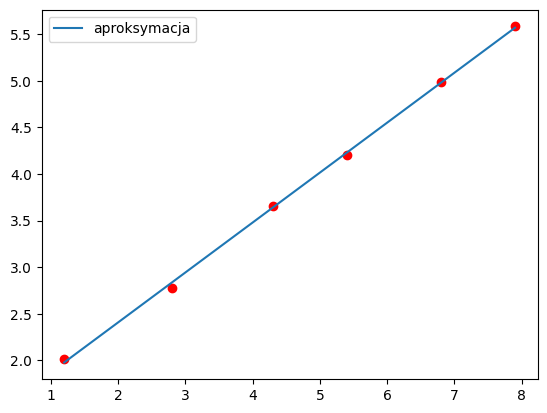

In [190]:
k,l = mean_square(x,ln_y)
plt.plot(x,k*x+l,label="aproksymacja")
plt.scatter(x,ln_y,color="red")
plt.legend()

współczynnik a:3.788857960482218
współczynnik b:0.536583696971039


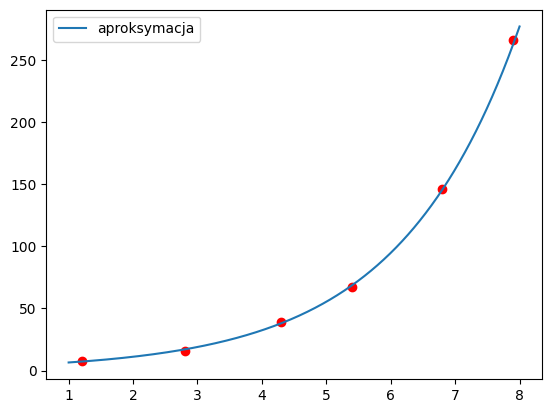

In [191]:
a = np.exp(l)
b = k
def f(x):
    return a*np.exp(b*x)
rng = np.linspace(1,8,1000)
plt.scatter(x,y,color="red")
plt.plot(rng,f(rng),label="aproksymacja")
plt.legend()
print("współczynnik a:{}".format(a))
print("współczynnik b:{}".format(b))

In [192]:
y_mean = np.mean(ln_y)
n = len(ln_y)
std = np.sqrt(np.sum((ln_y-y_mean)**2)/n)
print("Odchylenie standardowe wynosi: {}".format(std))

Odchylenie standardowe wynosi: 1.2230874727609167


# Zadanie 5

In [193]:
T = np.array([0, 21.1, 37.8, 54.4, 71.1, 87.8, 100])  
mu_k = np.array([1.79, 1.13, 0.696, 0.519, 0.338, 0.321, 0.296])  

n=len(T)
m=4

A = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        A[i,j] = T[i]**j
# print(A)

# Rozwiązanie (A^T A) x = A^T b
ATA = np.dot(A.T, A)  
ATb = np.dot(A.T, mu_k) 
coeff = np.linalg.solve(ATA, ATb)  # Rozwiązanie równania

a0, a1, a2, a3 = coeff
print(f"Współczynniki wielomianu: a3 = {a3:.4e}, a2 = {a2:.4e}, a1 = {a1:.4e}, a0 = {a0:.4e}")

def W(T):
    return a3 * T**3 + a2 * T**2 + a1 * T + a0



Współczynniki wielomianu: a3 = -8.4589e-07, a2 = 3.2857e-04, a1 = -3.9321e-02, a0 = 1.7957e+00


μ_k dla T = 10°C: 1.4345 x 10^-6 m^2/s
μ_k dla T = 30°C: 0.8889 x 10^-6 m^2/s
μ_k dla T = 60°C: 0.4366 x 10^-6 m^2/s
μ_k dla T = 90°C: 0.3016 x 10^-6 m^2/s


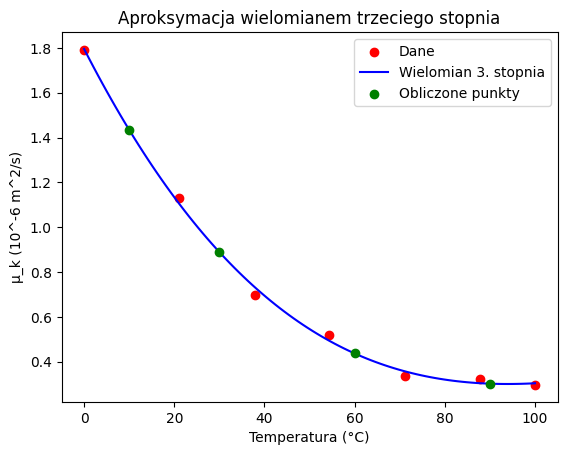

In [194]:
T_new = np.array([10, 30, 60, 90])
mu_k_new = W(T_new)

for temp, value in zip(T_new, mu_k_new):
    print(f"μ_k dla T = {temp}°C: {value:.4f} x 10^-6 m^2/s")

# Wizualizacja
T_fit = np.linspace(min(T), max(T), 100)
mu_k_fit = W(T_fit)

plt.scatter(T, mu_k, label="Dane", color="red")
plt.plot(T_fit, mu_k_fit, label="Wielomian 3. stopnia", color="blue")
plt.scatter(T_new, mu_k_new, label="Obliczone punkty", color="green", zorder=5)
plt.legend()
plt.xlabel("Temperatura (°C)")
plt.ylabel("μ_k (10^-6 m^2/s)")
plt.title("Aproksymacja wielomianem trzeciego stopnia")
plt.show()

# Zadanie 6

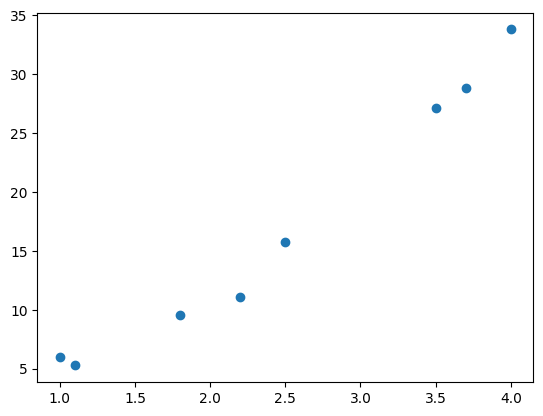

In [195]:
x = np.array([1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7])  
y = np.array([6.008, 15.722, 27.13, 33.772, 5.257, 9.549, 11.098, 28.828])  
plt.scatter(x,y)
rng = np.linspace(1,4,1000)

## funkcja liniowa
`

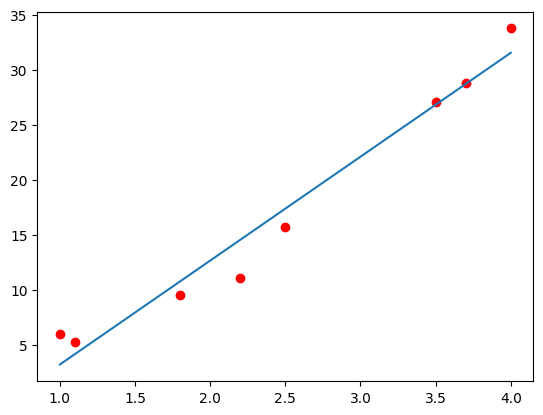

In [196]:
a,b = mean_square(x,y)
plt.plot(rng, a*rng+b)
plt.scatter(x,y,color="red")

## funkcja kwadratowa

In [197]:
n=len(x)
m=3

A = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        A[i,j] = x[i]**j
# print(A)

# Rozwiązanie (A^T A) x = A^T b
ATA = np.dot(A.T, A)  
ATb = np.dot(A.T, y) 
coeff = np.linalg.solve(ATA, ATb)  # Rozwiązanie równania

a0, a1, a2 = coeff
print(f"Współczynniki wielomianu:, a2 = {a2:.4e}, a1 = {a1:.4e}, a0 = {a0:.4e}")

def W(x):
    return  a2 * x**2 + a1 * x + a0

Współczynniki wielomianu:, a2 = 2.1081e+00, a1 = -1.0689e+00, a0 = 4.4057e+00


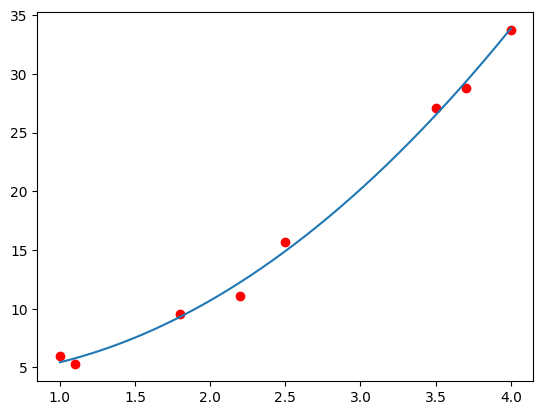

In [198]:
plt.plot(rng, W(rng))
plt.scatter(x,y,color="red")

Możemy sprawdzić która funkcja lepiej przybliża dane licząc błędy aproksymacji

In [199]:
err_lin = np.sum(a*x+b - y)
err_sqr = np.sum(W(x) - y)
print("błąd aproksymacji liniowej: ",err_lin)
print("błąd aproksymacji kwadratowej: ",err_sqr)

błąd aproksymacji liniowej:  -6.306066779870889e-14
błąd aproksymacji kwadratowej:  1.7763568394002505e-15


Jak widać funkcja kwadratowa ma 10 razy mniejszy błąd, stąd jest ona lepszą aproksymacją